 # Psychopy experiment
 
 https://www.psychopy.org/download.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
import random
from psychopy import visual, core, event, gui, data
import MotionClouds as MC
import pygame

pygame 2.0.1 (SDL 2.0.14, Python 3.7.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
exp_info = {'exp_name': "Spot the digit!", 'participant':'laurent'}

In [3]:
cache_folder = os.path.join('/tmp','cache')
data_folder = os.path.join('/tmp','json')
data_folder

'/tmp/json'

In [4]:
%mkdir -p {data_folder} {cache_folder}

In [5]:
%cd ../notebooks

/Users/typhaine/Documents/Doc Gorilla/WhereIsMyMNIST/notebooks


# Generating a trial

In [6]:
from main import init
args = init()


Using filename= ../data/2021-02-15


In [36]:
args.do_mask = False

## Loading the MNIST dataset

In [7]:
import torch
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [8]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.1307,), (0.3081,))])
dataset = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, transform=transform),
                                   batch_size=64, shuffle=True)

examples = enumerate(dataset)
batch_idx, (data, targets) = next(examples)

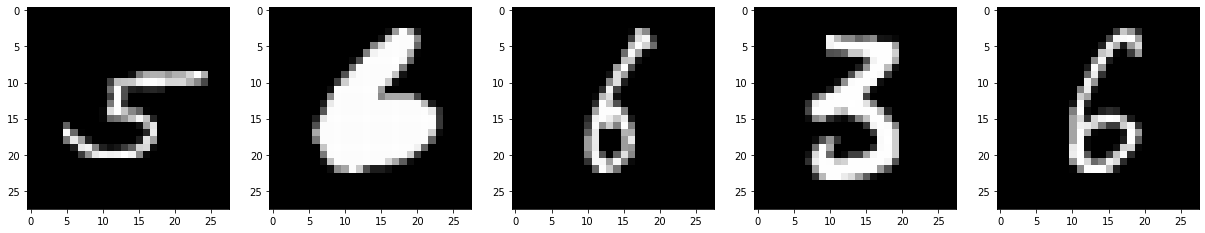

In [9]:
N_plot = 5
fig, axs = plt.subplots(1, N_plot, figsize = (21, 5))
for i_ax, ax in enumerate(axs):
    ax.imshow(data[i_ax, 0, :, :], cmap=plt.gray())

## Placing the digits in some random noise

In [10]:
import sys
sys.path.append("/Users/typhaine/Documents/Doc Gorilla/WhereIsMyMNIST/notebooks")
import display 

In [12]:
d = display.Display(args)
print(d)

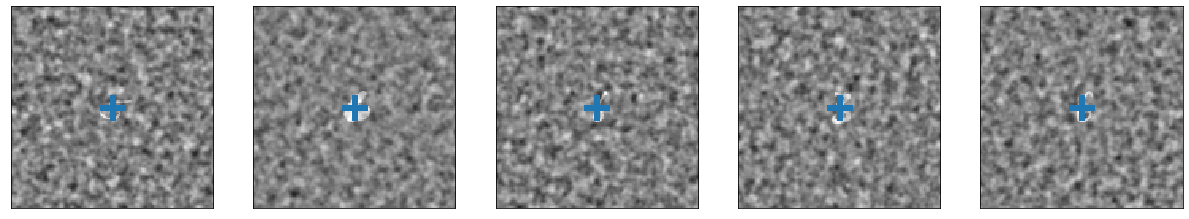

In [37]:
N_plot = 5

fig, axs = plt.subplots(1, N_plot, figsize = (21, 8))
for i_ax, ax in enumerate(axs):
    data_fullfield, i_offset, j_offset = d.draw(data[i_ax, 0, :, :].numpy(),
                                                i_offset=1, j_offset=1, radius=0, theta=0)
    ax = d.show(ax, data_fullfield)

In [40]:
idx, i_offset, j_offset = 20,20, 20

In [41]:
# data_fullfield, i_offset, j_offset = d.draw(data[0, 0, :, :].numpy())
idx,i_offset, j_offset = 5, -29, 21
data_fullfield = d.place_object(data[idx, 0, :, :].numpy(), i_offset, j_offset)

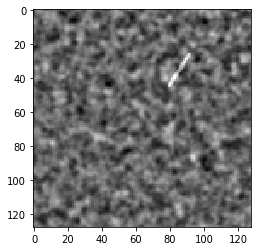

In [42]:
plt.imshow(data_fullfield)

TypeError: Invalid shape (128,) for image data

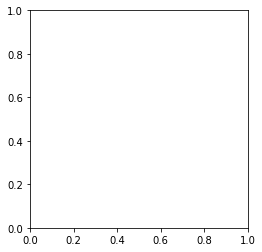

In [20]:

plt.imshow(data_fullfield[1], cmap= "gray")

## Defining variables 

In [24]:
downscale = 1
fx, fy, ft = MC.get_grids(MC.N_X/downscale, MC.N_Y/downscale, 60)

In [ ]:
test_length = 150     # number of trials
fixation_length = .5  # length of fixation, in second

trial_length = 4.00  # length of a trial, in second
stim_length = 0.25   # average length of stim, in second
fps = 50

fullscr = False

#fullscr = True

In [ ]:
def generate_frames(   ):
    fnames = list()
    for i_frame in range(100): # while True - will make never ending loop
        
        im = d.place_object(data[idx, 0, :, :].numpy(), i_offset, j_offset)
        im = (MC.rectif(im) * 255).astype('uint8')
        fname = f'{cache_folder}/%s_%s.png'
        imageio.imwrite(fname, im[:,:])
        fnames.append(fname)
    return fnames

In [ ]:
%mkdir -p tmp

In [25]:
# MC.random_cloud(np.pi/2, B_theta=np.pi/2, B_sf=0.1)
env = MC.envelope_gabor(fx, fy, ft)

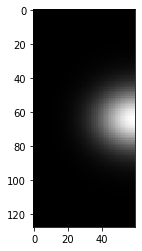

In [27]:
env.shape
plt.imshow(env[1])

In [ ]:
win = visual.Window(size = (800,600),fullscr=fullscr, color=[0,0,0], rgb = None, winType= None, monitor= None, units='norm')
# Reference: https://www.psychopy.org/api/visual/window.html#psychopy.visual.Window


mouse = event.Mouse(newPos=(0, 0), visible=True)
# x0, y0 = mouse.getPos()
# event.clearEvents()
instructions = """
At each trial you see a series of textured images, report if you 
spot a specific digit by pressing the space bar.

Press the space bar to begin the experiment.

"""

msg = visual.TextStim(win, text=instructions, alignHoriz='center', alignVert='center', color='black')
msg.draw()
win.flip()

# while not mouse.mouseMoved(distance=.05): 
    # event.clearEvents()
# Reference: https://www.psychopy.org/api/event.html

    
fixation = visual.ShapeStim(vertices='cross', win=win, size=0.05, pos=[0, 0], fillColor='black', units='height')
fixation.autolog = False

MC1 = MC.random_cloud(env) # MC.random_cloud(np.pi/2, B_theta=np.pi/2, B_sf=0.1)
bitmap1 = visual.ImageStim(win, MC1, size=0.8, units='height', interpolate= True)
bitmap1.autolog = False 

msg = visual.TextStim(win, text='Get Ready!!!', color='black')
# Reference: https://www.psychopy.org/api/visual/textstim.html#psychopy.visual.TextStim

import time
start_time = time.time()
print("Test started")

for trial in range(test_length):
    clock = core.Clock()
    # Refereence: https://www.psychopy.org/api/core.html

    while 0.0 <= clock.getTime() < fixation_length:  # fixation
        fixation.draw()
        win.flip()
    
    # theta = (np.random.randn())*B_theta #doute
    
    # generate frames
    fnames = generate_frames(    ) 
    
    for i_frame, fname in enumerate(fnames): 
        bitmap1.setImage(MC1)
        bitmap1.draw()
        win.flip()

        mouse.setPos(newPos=(0, 0))
        x0, y0 = mouse.getPos()
        event.clearEvents()

        while not mouse.mouseMoved(distance=.05): 
            # this creates a never-ending loop
            # until we move the mouse
            event.clearEvents()

        x, y = mouse.getPos()
        if x < 0:
            answer = 'left'
        else: #elif x > 0:
            answer = 'right'
            if x == 0: print('this should not happen 😤')
        event.clearEvents() 

        ans = event.getKeys()   

        if ans == ['escape', 'q']:
            win.close()
            core.quit()

    correct = ((theta > 0) and answer == 'right') or ((theta < 0) and answer == 'left')
    print('At trial ', trial, 'Angle=', '%3.3f' % (theta*180/np.pi), 'answer is ',  answer, '(correct=', correct, '); bandwidth=', '%.3f' % (B_theta*180/np.pi),'B_sf=', B_sf)   
       
    # Output shape per trial is : trial number, shift direction, answered shift and b_theta
    ans_list.append([trial, theta, answer, B_theta, B_sf])

win.close()

In [ ]:
import json
json.dump(ans_list, open( os.path.join(data_folder, 'Psychophys_discrim_%s.json' % exp_info['participant']),'w',encoding="utf8"))
